### Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Read data into a new dataframe

In [2]:
housing_data = pd.read_csv('home_data.csv')

### Check out the data

In [10]:
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Print the column headings

In [11]:
print list(housing_data.columns.values)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### Apply a transform to the _date_ column

In [17]:
housing_data.date = housing_data.date.map(lambda d: pd.to_datetime(str(d)))

### Check out the transformed column

In [13]:
housing_data.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

### Return all houses that have more than 1 floor

In [14]:
housing_data[housing_data.floors > 1].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
9,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
12,114101516,2014-05-28,310000,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
14,1175000570,2015-03-12,530000,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


### Plot _price_ vs. *sqft_living*: is there a correlation?

c:\users\dickm\appdata\local\continuum\anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


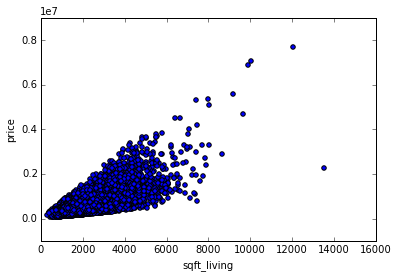

In [15]:
housing_data.plot(kind='scatter', x='sqft_living', y='price', xlim=(0,16000))

### Store feature data in _X_

In [16]:
X = housing_data.sqft_living
type(X)

pandas.core.series.Series

### Store target data in _y_

In [17]:
y = housing_data.price

### Create a train-test split of the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Check dimensions of *X_train*

In [19]:
X_train.shape

(17290L,)

### Check dimensions of *y_train*

In [20]:
y_train.shape

(17290L,)

### The _shape_ properties are missing a dimension, so fix this for *X_train* and *y_train*

In [21]:
X_train = X_train.reshape((17290, 1))

In [22]:
y_train = y_train.reshape((17290,1))

### Check the shape of the test data structures

In [23]:
X_test.shape

(4323L,)

In [24]:
y_test.shape

(4323L,)

### Fix the dimensions on the test data structures

In [25]:
X_test = X_test.reshape((4323,1))

In [26]:
y_test = y_test.reshape((4323,1))

### Instantiate a `LinearRegression` object

In [27]:
lin_reg = LinearRegression()

### Fit a model using the training data

In [28]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluate the model

In [29]:
y_pred = lin_reg.predict(X_test)

In [30]:
print metrics.mean_squared_error(y_test, y_pred)

print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

72375755758.4
269027.425662


### Plot the model with the data

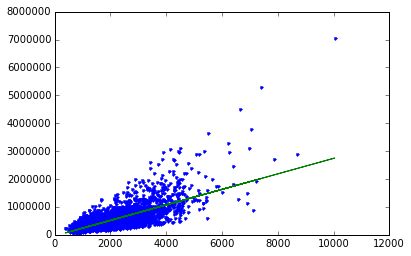

In [31]:
plt.plot(X_test, y_test, '.', X_test, y_pred, '-')

### Plot *price* vs. *zipcode*

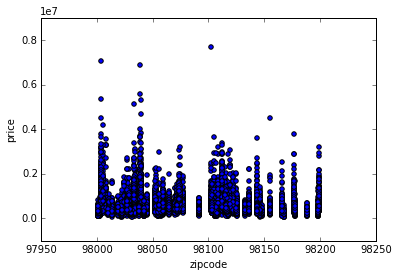

In [32]:
housing_data.plot(kind='scatter', x='zipcode', y='price')

### Let's build a model based on six features and evaluate it.

In [33]:
feature_subset = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [34]:
X_feature_subset = housing_data[feature_subset]
type(X_feature_subset)

pandas.core.frame.DataFrame

In [35]:
X_train_feature_subset, X_test_feature_subset, y_train_feature_subset, y_test_feature_subset = train_test_split(X_feature_subset, y, test_size = 0.2)

In [36]:
lin_reg_feature_subset = LinearRegression()

In [37]:
lin_reg_feature_subset.fit(X_train_feature_subset, y_train_feature_subset)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_pred_feature_subset = lin_reg_feature_subset.predict(X_test_feature_subset)

In [39]:
print metrics.mean_squared_error(y_test_feature_subset, y_pred_feature_subset)

print np.sqrt(metrics.mean_squared_error(y_test_feature_subset, y_pred_feature_subset))

66314723754.5
257516.453367


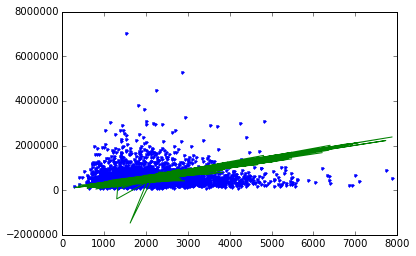

In [48]:
plt.plot(live_size, y_test, '.', live_size, y_pred_feature_subset, '-')

In [47]:
live_size = X_test_feature_subset['sqft_living']

In [54]:
print len(y_pred_feature_subset)
print len(y_test)
print len(y_pred)

4323
4323
4323


### Scrap to figure out how to encode with 

In [3]:
print housing_data.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')


In [5]:
from ohe import one_hot_dataframe
zip_data = housing_data[['zipcode']]
zip_data.zipcode = zip_data.zipcode.map(lambda z: str(z)).map(lambda z: int(z))

In [6]:
print zip_data.columns
#len(zip_data.groupby('zipcode').index)

Index([u'zipcode'], dtype='object')


In [8]:
zip_data_ohe,_,_ = one_hot_dataframe(zip_data, ['zipcode'])
zip_data_ohe.head()

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
